Matplotlib绘图

整洁数据集：
1. 每个变量占一列
2. 每个观察值占一行
3. 每个观察单位是一个表格

条形图：Bar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


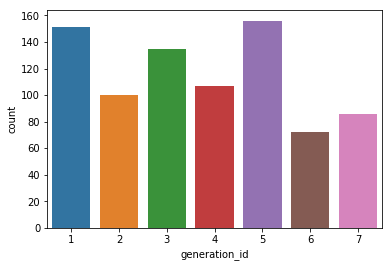

In [4]:
## 绘制游戏精灵的版本信息
sb.countplot(data=pokemon, x='generation_id')

In [5]:
## 上图中，游戏总共有7代，Y轴为每代引入的精灵数目
## 颜色面板
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

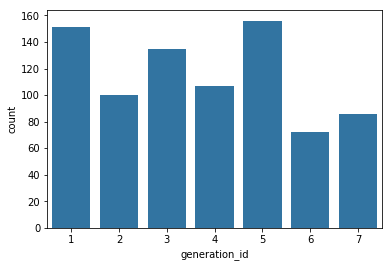

In [6]:
## 只用一种颜色显示
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon, x='generation_id', color=base_color)

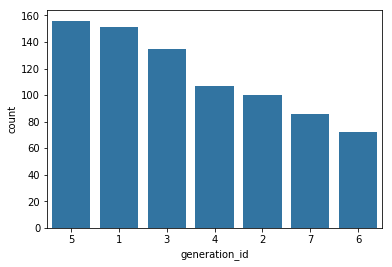

In [7]:
## 排序绘图
type_order = pokemon['generation_id'].value_counts().index
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=type_order)

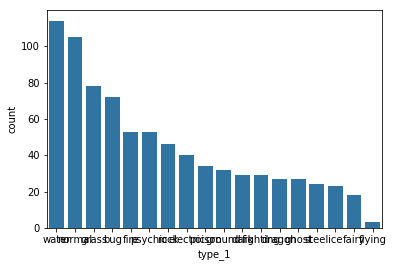

In [8]:
## type_1属性绘图
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, x='type_1', color=base_color, order=type_order)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

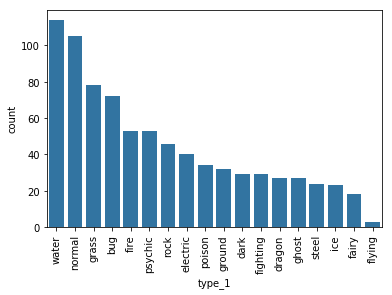

In [9]:
## 上图中，X轴标签混在一起
## 将X轴标签旋转90°
sb.countplot(data=pokemon, x='type_1', color=base_color, order=type_order)
plt.xticks(rotation=90)

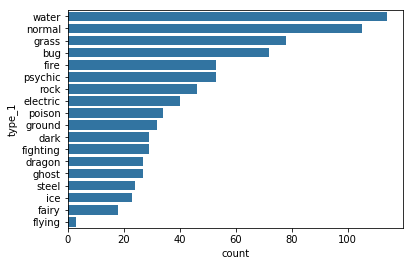

In [10]:
## 绘制水平条形图
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order)

绘制相对比例的条形图

In [21]:
## type_1, type_2合并为type
## 删除NaN
pkmn_types = pokemon.melt(id_vars=['id', 'species'], value_vars=['type_1', 'type_2'], \
                          value_name='type', var_name='type_level').dropna()

pandas.core.frame.DataFrame

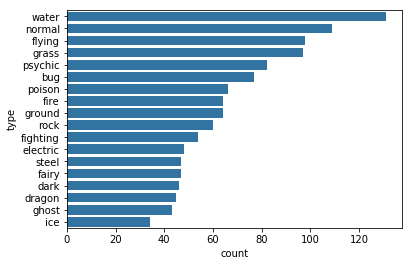

In [29]:
type_count = pkmn_types['type'].value_counts()
type_index = type_count.index
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_index)

In [30]:
## 计算各种精灵的百分比
n_pokemon = pokemon.shape[0]
max_type_count = type_count[0]
max_prop = max_type_count / n_pokemon  # 最大百分比
print(max_prop)

0.1623296158612144


In [32]:
## 创建X轴刻度
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ["{:0.2f}".format(v) for v in tick_props]

Text(0.5,0,'proportion')

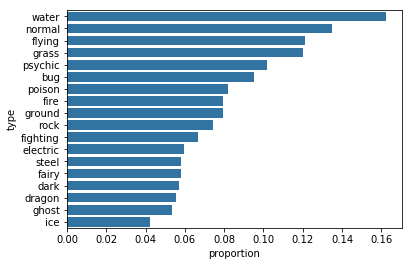

In [36]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_index)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel("proportion")

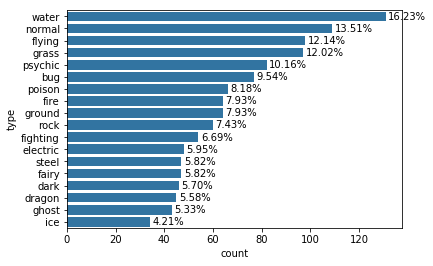

In [38]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_index)

## 条形图上加上百分比
for i in range(type_count.shape[0]):
    count = type_count[i]
    pct_string = "{:0.2f}%".format(100 * count / n_pokemon)
    ## count+1: X轴位置
    ## i: Y轴位置
    ## pct_string: 添加的文本内容
    ## va: 文本放置方式
    plt.text(count + 1, i, pct_string, va='center')